In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def P(x):
    #return (np.sin(x) + 0.5*np.sin(2*x) + 0.2*sin(5*x)+ 0.1*sin(9*x))
    return x

In [468]:
def auto_correlation(a,tau):  
    '''
    a --> must be a numpy array
        it is the list which we want to calculate its correlation
    tau --> the correlation will be computed up tp tau
    
    '''
    auto_corr = []
    shift_ = 1
    for i in range(tau):
        shift_+=1
        self_ = a[:-shift_]
        shift = a[shift_:]
        auto_corr.append((np.mean(self_*shift) - np.mean(self_)*np.mean(shift))/(np.std(self_)*np.std(shift)))
    return auto_corr

In [2]:
np.array([1,33,4]).shape

(3,)

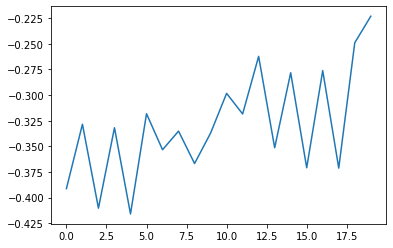

In [44]:
a = np.arange(1,100,1)**5
plt.plot(auto_correlation(np.array(a),20))

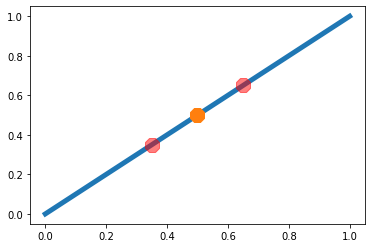

In [4]:
x = np.linspace(0,1,100)
y = P(x)
plt.plot(x,y,linewidth=5)
plt.plot([0.5],[0.5],'8',markersize=15)
plt.plot([0.65],[0.65],'8r',markersize=15,alpha=0.5)
plt.plot([0.35],[0.35],'8r',markersize=15,alpha=0.5)

In [5]:
#x = np.random.random()*3.14
x=0.5
i = x
rand = []
delta = 0.3
all_counter = 0
accept_counter= 0
rate = []

In [6]:
for iter_ in range(100000):
    all_counter+=1
    j = (i + (np.random.random()*2-1)*delta)%1
    #j = np.random.random()
    rand_ = np.random.random()
    if rand_< P(j)/P(i) :
        accept_counter+=1
        rand.append(j)
        i=j
    rate.append(accept_counter/all_counter)

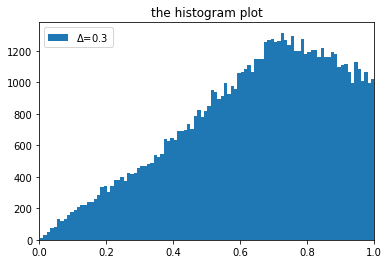

In [7]:
a,b,c = plt.hist(rand,bins=100,label = '$\Delta$={}'.format(delta))
plt.title('the histogram plot')
plt.xlim([0,1])
plt.legend()

Text(0.5, 1.0, 'acceptance rate')

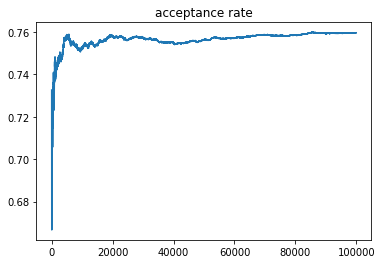

In [9]:
plt.plot(rate[100:])
plt.title('acceptance rate')

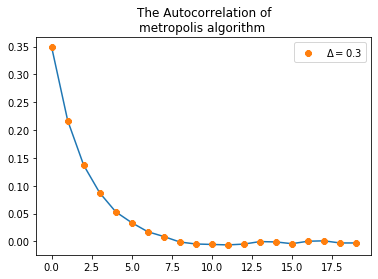

In [10]:
plt.plot(auto_correlation(np.array(rand),20))
plt.plot(auto_correlation(np.array(rand),20),'8',label='$\Delta={}$'.format(delta))
plt.title('The Autocorrelation of\nmetropolis algorithm ')
plt.legend()

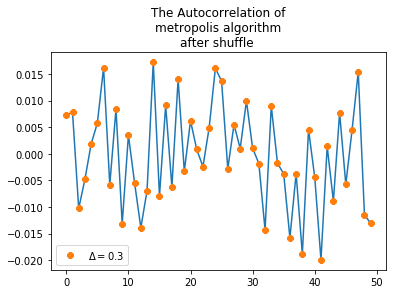

In [11]:
ind = np.random.randint(len(rand),size=10000)
rand_ = np.array(rand)[ind]
plt.plot(auto_correlation(np.array(rand_),50))
plt.plot(auto_correlation(np.array(rand_),50),'8',label='$\Delta={}$'.format(delta))
plt.title('The Autocorrelation of\nmetropolis algorithm\nafter shuffle ')
plt.legend()


## Guassian Random Generator

In [12]:
def P(x,sigma,mu):
    return (1/(2*np.pi)**0.5/sigma)*np.exp(-(x-mu)**2)/2/sigma**2

In [13]:
x = np.arange(0,8,0.01)
y = P(x,1,4)
plt.plot(x,y)
plt.title('Guassian function')

Text(0.5, 1.0, 'Guassian function')

In [14]:
#x = np.random.random()*3.14
x=4
i = x
rand = []
delta = 7.3
all_counter = 0
accept_counter= 0
rate = []

In [15]:
for iter_ in range(100000):
    all_counter+=1
    j = (i + (np.random.random()*2-1)*delta)%8
    #j = np.random.random()
    rand_ = np.random.random()
    if rand_< np.abs(P(j,1,4)/P(i,1,4)) :
        accept_counter+=1
        rand.append(j)
        i=j
    rate.append(accept_counter/all_counter)

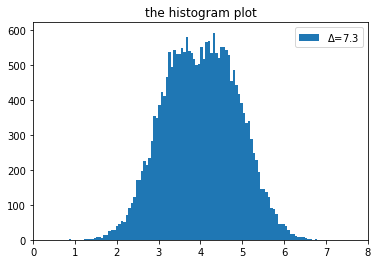

In [16]:
a,b,c = plt.hist(rand,bins=100,label = '$\Delta$={}'.format(delta))
plt.title('the histogram plot')
plt.xlim([0,8])
plt.legend()

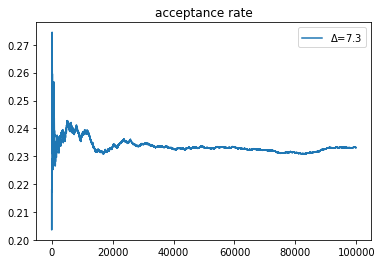

In [17]:
plt.plot(rate[100:],label = '$\Delta$={}'.format(delta))
plt.title('acceptance rate')
plt.legend()

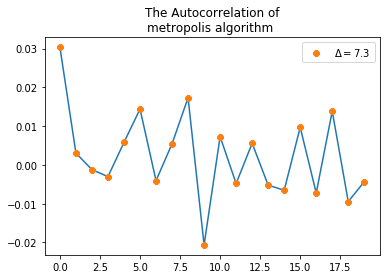

In [18]:
plt.plot(auto_correlation(np.array(rand),20))
plt.plot(auto_correlation(np.array(rand),20),'8',label='$\Delta={}$'.format(delta))
plt.title('The Autocorrelation of\nmetropolis algorithm ')
plt.legend()

# ISING MODEL


In [6]:
def lattice_gen(L):
    '''
    generates random lattice with size L*L
    the lattice will contain +1 -1 inside with random distribution
    '''
    lattice = np.random.random((L,L))
    lattice[lattice>0.5]=1
    lattice[lattice<0.5]=-1
    return lattice

In [7]:
def update(lattice_,beta,J):
    '''
    this function will update the lattice i.e. it will take one montecarlo step
    the number of updates will be l^3 in which the L is the lattice side size.
    note that the 'lattice' arg must be numpy array
    beta is 1/KT
    '''
    lattice = lattice_*1
    dE_list = [0]*18
    for i in [8,4,0,-4,-8]:
        dE_list[i]=np.exp(-J*i)
    L = lattice.shape[0]
    for scan in range(L**2):
        i,j=np.random.randint(L,size=2)
        #lattice[i,j]*=-1
        dE = 2*lattice[i,j]*(lattice[(i-1)%L,j]+lattice[(i+1)%L,j]+lattice[i,(j-1)%L]+lattice[i,(j+1)%L])
        rand = np.random.rand()
        e = dE_list[int(dE)]
        ee = dE_list[int(-dE)]
        if rand <e/(e+ee):
            lattice[i,j]*=-1
    return lattice

In [8]:
def energy(lattice,J):
    E = 0
    Lx, Ly = lattice.shape
    for i in range(Lx):
        for j in range(Ly):
            E += lattice[i,j]*(lattice[(i-1)%L,j]+lattice[(i+1)%L,j]+lattice[i,(j-1)%L]+lattice[i,(j+1)%L])
    return E/2

In [9]:
dE_list = [0]*18
for i in [8,4,0,-4,-8]:
    dE_list[i]='exp(-J*{})'.format(i)
dE_list[-4]


'exp(-J*-4)'

In [57]:
def f(a):
    ap = a*1
    i,j = np.random.randint(4,size=2)
    ap[i,j] = 12+3
    return ap

Text(0.5, 1.0, 'lattice with random spins in it')

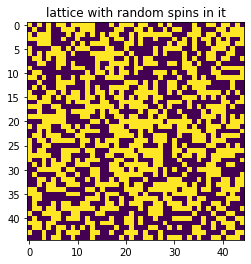

In [345]:
L = 45
J=70
beta =1
lattice = lattice_gen(L)
plt.imshow(lattice)
plt.title('lattice with random spins in it')

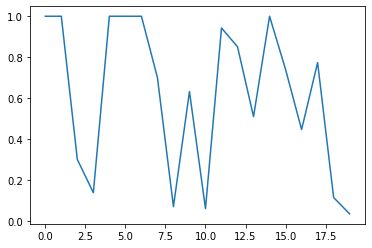

In [346]:
Ms = [[]]
ind = 0
for ensemble in range(20):
    lattice = lattice_gen(L)
    for k in range(300):
        lattice = update(lattice,beta,J)
    Ms[ind].append(np.abs(lattice.mean()))
plt.plot(Ms[0])
#plt.errorbar(Ms[0],yerr=Ms[1])

In [347]:
print(np.mean(Ms[0]))
print(np.std(Ms[0]))

0.6159506172839507
0.3643877335514323


# Testing the equli

In [10]:
L = 30
J = 50
beta =1
k=170
Q = 40
#E_values
#lattice_sample = []
#ismaple = (15,20)
#jsample = (15,20)
#mean = np.zeros(k)
J_list = [0.1*i for i in range(1,15)]
M = []
for J in J_list:
    print('for J=%i is performing'%J)
    for N in range(Q):
        lattice = lattice_gen(L)
        #M_values = []
        for K in range(k):
            lattice = update(lattice,beta,J)
            #M_values.append(np.abs(lattice.mean()))
        #E_values.append((J,np.abs(energy(lattice))))
        M.append((J,np.abs(lattice.mean())))
        #plt.figure(figsize=(2,2))
        #plt.plot(M_values)
        #mean += M_values
        #lattice_sample.append(lattice[ismaple[0]:isample[1],jsample[0]:jsample[1]])
#plt.title('The Changes of M over Updates for {} ensembles\nL={},$\\beta$={},J={} '.format(Q,L,beta,J))
#plt.title('J={}'.format(J))
#plt.xlabel('the number of update')
#plt.xticks([i-1 for i in range(1,len(M_values),20)])
#plt.ylabel('M')
#plt.plot(np.array(mean)/Q,linewidth=4.5,label='the mean of M over ensembles' )
#plt.legend()

for J=0 is performing
for J=0 is performing
for J=0 is performing
for J=0 is performing
for J=0 is performing
for J=0 is performing
for J=0 is performing
for J=0 is performing
for J=0 is performing
for J=1 is performing
for J=1 is performing
for J=1 is performing
for J=1 is performing
for J=1 is performing


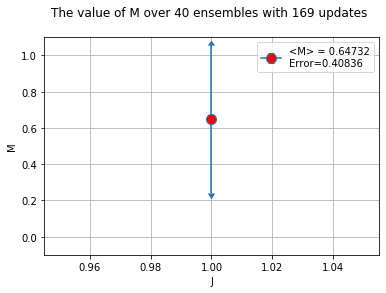

In [11]:
plt.errorbar(1,np.mean(M), np.std(M),uplims=True,lolims=True,marker='o', mfc='red'
             ,markersize=10,label='<M> = %3.5f\nError=%3.5f'%(np.mean(M), np.std(M)))
plt.title('The value of M over {} ensembles with {} updates \n '.format(Q,K,L,beta,J))
plt.xlabel('J')
plt.ylabel('M')
plt.ylim([-0.1,1.1])
plt.grid('on')
plt.legend()

In [12]:
M_data = np.array(M)
M_Data =[]
i=0
for J in J_list:
    M_Data.append((J,np.mean(M_data[50*i:50*(i+1),1]), np.std(M_data[50*i:50*(i+1),1])))
    i+=1
    #print(M_data[50*i:(i+1)*50])

/home/ali/anaconda3/envs/python/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ali/anaconda3/envs/python/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ali/anaconda3/envs/python/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ali/anaconda3/envs/python/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ali/anaconda3/envs/python/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
M_Data = np.array(M_Data)
plt.plot(M_Data[:,0],M_Data[:,1])
plt.errorbar(M_Data[:,0],M_Data[:,1],M_Data[:,2],uplims=True,lolims=True,marker='o', mfc='red'
             ,markersize=10)
plt.title('The M vs. J plot'+'\nL={},$\\beta$={}'.format(L,beta)+'\nEach Dot is averaged over {} ensembles \nand each ensemble is updated {} times'.format(Q,K+1))
plt.xlabel('J')
plt.ylabel('M')

Text(0, 0.5, 'M')

In [37]:
plt.plot(M_Data[:,0],M_Data[:,2])
plt.plot(M_Data[:,0],M_Data[:,2],'8',label='C data')
plt.title('C Vs. J plot'+'\nL={},$\\beta$={}'.format(L,beta)+'\nEach Dot is averaged over {} ensembles \nand each ensemble is updated {} times'.format(Q,K+1))
plt.xlabel('J')
plt.ylabel('C')
plt.plot([0.68,0.68],[0.0,0.37],'-.',label ='$J_{c}$')
plt.ylim([0.05,0.4])
plt.legend(loc=4)

In [41]:
for i in range(5):
    for j in range(5):
        plt.plot(auto_correlation(np.array(lattice_sample)[:,i,j],10))
plt.title('The auto corelation over ensembles \nL={},$\\beta$={},J={} '.format(L,beta,J))
plt.xlabel('$\\tau$')
plt.ylabel('AutoCorrelation')

NameError: name 'auto_correlation' is not defined

In [500]:
lattice_sample[1]

array([[-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.]])

In [478]:
L = 30
J = 1
beta = 1
k= 200



for K in range(k)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1

## finding the attractor

In [5]:
L=100
J=1
beta = 1
mean_values = [[],[]]
m=0
for J in [0.55,1]:
    for k in range(20):
        mean = 0
        for i in range(20):
            lattice = lattice_gen(L)
            mean+=update(lattice,beta,J).sum()
        mean_values[m].append(np.abs(mean/20))
        print('{} ensmble is runngin'.format(k),end='')
    m+=1

KeyboardInterrupt: 

In [135]:
plt.plot(np.array(mean_values[0]))
plt.plot(np.array(mean_values[0]),'8',label = 'the M of lattice with J=0.55')
plt.plot(np.array(mean_values[1]))
plt.plot(np.array(mean_values[1]),'8',label = 'the M of lattice with J=1')
#plt.ylim([-0.2,0.2])
#plt.plot(mean_values,'8')

## Sampling the matrices and computing its autocorrelation


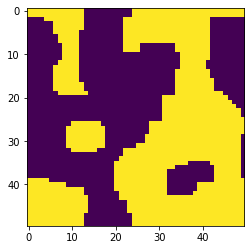

In [26]:
beta =1
J = 0.9
L=50
lattice = lattice_gen(L)
plt.imshow(lattice)
plt.figure()
plt.imshow(update(lattice,beta,J))

In [27]:
M = [[] for i in range(3)]
k=-1
for J in [0.1,0.8,30]:
    k+=1
    for i in range(100):
        lat = update(lattice,beta,J)
        M[k].append(np.abs(np.array(lat).mean()))

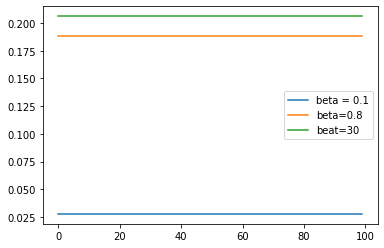

In [28]:
plt.plot([np.mean(M[0]) for i in range(len(M[1]))],label='beta = 0.1')
#plt.plot(M[0])
plt.plot([np.mean(M[1]) for i in range(len(M[1]))],label='beta=0.8')
#plt.plot(M[1])
plt.plot([np.mean(M[2]) for i in range(len(M[1]))],label='beat=30')
#plt.plot(M[2])
#plt.plot([np.mean(M[3]) for i in range(len(M[1]))],label='beat=2')
plt.legend()

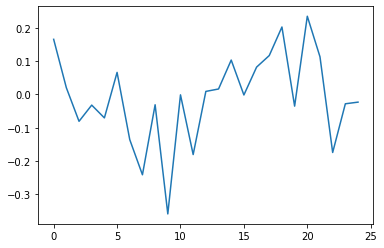

In [234]:
plt.plot(auto_correlation(np.array(M[1]),25))

In [ ]:
###############33

In [139]:
np.array(mean_values[0]).mean()

189.35500000000002

In [140]:
np.array(mean_values[1]).mean()

210.24

In [337]:
looot= lattice_gen(50)

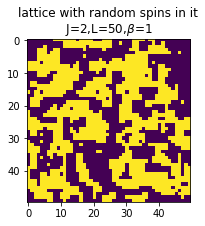

In [340]:
plt.figure(figsize=(3,3))
plt.imshow(looot)
plt.title('lattice with random spins in it\nJ={},L={},$\\beta$={}'.format(2,50,1))
plt.figure(figsize=(2,2))
looot = update(looot,1,10)
plt.imshow(looot)


<ErrorbarContainer object of 3 artists>

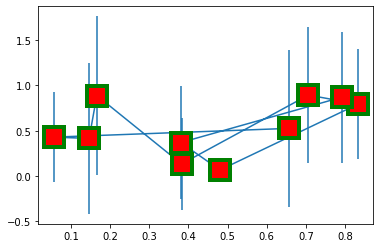

In [522]:
x,y,yerr = np.random.rand(3,10)
plt.errorbar(x, y, yerr, marker='s', mfc='red',
         mec='green', ms=20, mew=4)

In [77]:
plt.imshow(np.abs(np.fft.fft2(lattice)),cmap='prism')
#plt.imshow(np.abs(np.fft.fft2(lattice)),cmap='viridis')

In [269]:
lattices_for_fixed_temp = []

In [256]:
for i in range(40):
    lattice = lattice_gen(30)
    lattice = update(lattice,1)
    lattices_for_fixed_temp.append(lattice)

In [257]:
plt.imshow(lattices_for_fixed_temp[9])
plt.figure()
plt.imshow(lattices_for_fixed_temp[8])

In [107]:
# calculating the correlation if fixed (i,j) over different ansamples
single_value = []
i,j = 15,15
for k in range(len(lattices_for_fixed_temp)):
    single_value.append(lattices_for_fixed_temp[k][i,j])
    

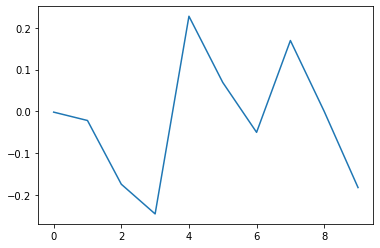

In [109]:
plt.plot(auto_correlation(np.array(single_value),10))

In [355]:
x = [1,2,3,4]
y = [2,4,2,1]
label = x
plt.plot(x,y)
plt.xticks(x,label)

([<matplotlib.axis.XTick at 0x7fb041844f60>,
 <a list of 4 Text xticklabel objects>)

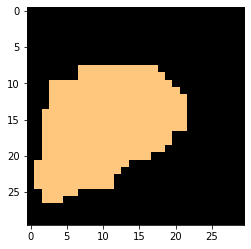

In [258]:
plt.imshow(lattice)

In [234]:
plt.imshow(lattice)

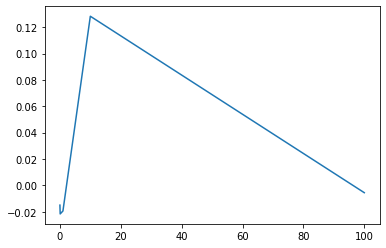

In [241]:
M_list = np.array(M_list)
plt.plot(M_list[:,0],M_list[:,1])

In [233]:
M_list

[(0.1, 0.6355555555555555),
 (0.2, 0.9072222222222223),
 (1.0, 1.0),
 (10.0, 0.034444444444444444),
 (1000.0, 0.005)]

In [64]:
i

519

In [65]:
j

199

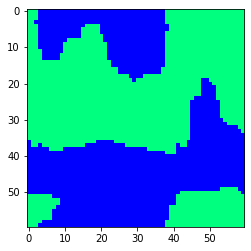

In [241]:
plt.imshow(lattice,cmap='winter')

In [5]:
plt.set_cmap('winter')


<Figure size 432x288 with 0 Axes>

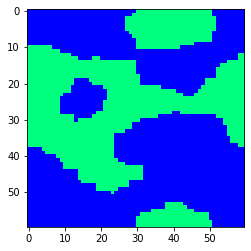

In [233]:
plt.imshow(lattice)

In [6]:
rand = np.random.random((10,10))

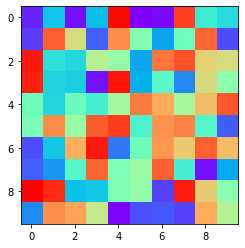

In [13]:
plt.imshow(rand,cmap='rainbow')

In [10]:
plt.imshow(rand)

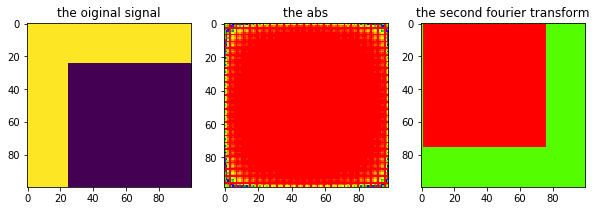

In [134]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(131,title='the oiginal signal')
ax.imshow(lattice)

ax2= fig.add_subplot(132,title='the abs')
ft = np.fft.fft2(lattice)
ax2.imshow(np.abs(ft[1:-1,1:-1]),cmap='prism')

ax3 =fig.add_subplot(133,title='the second fourier transform')
dft = np.fft.fft2(ft)
ax3.imshow(np.abs(dft),cmap='prism')




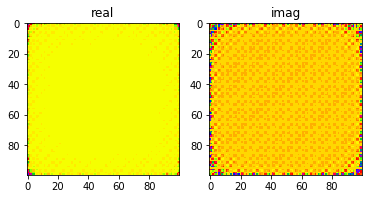

In [129]:
fig = plt.figure()
axx = fig.add_subplot(121,title='real')
axx.imshow(ft.real,cmap='prism')
axx2 = fig.add_subplot(122,title='imag')
axx2.imshow(ft.imag,cmap='prism')

# My results:

1. it is better to keep the lattice size small. because for bigger lattice sizes it takes alot to achive to the equlibitium
2. the lowes Variance in M vs. ensemble curve is with bigger lattice size